# Testing for preference using the Bayes factor

## Scenario

Consider a situation where the goal is to identify which of two configurations is preferred. For example, we would like to know if people in a population prefer blue vs red items. Each participant $i$ among a total of $N$ performs $n_i$ pairwise comparisons between objects of the two colors. We would like to use a statistical test to determine which of the two  configurations is preferred. The two competing hypotheses are $H_1$ (resp. $H_2$): items in the configuration $A_1$ (resp. $A_2$) are preferred to items in configuration $A_2$ (resp. $A_1$). The Bayesian analysis method I present here is adapted from Kass & Raftery, 1995 (see also chapter 5 of Robert, 2005) and was first published in Fauvel & Chalk, 2022. 

## Model

For a participant $i$, the responses in a series of preference comparisons between two configurations follows a binomial distribution $y_i = \mathcal{B}(n_i, p_i)$, where $n_i$ is the number of comparisons and $y_i$ is the number of comparisons for which the participant reported that $A_2$ is better than $A_1$. We put the conjugate beta prior $p_i \sim Beta \left( \frac{\xi}{\omega},\frac{1-\xi}{\omega}\right)$. Note that $\xi = \mathbb{E}(p_i)$. We assume that $\omega$ is constant, and $\xi$ follows a uniform distribution. Under $H_1$, the model is $\xi \sim \mathcal{U}([0,0.5])$, whereas under $H_2$, $\xi \sim \mathcal{U}([0.5,1])$. 
 

## The Bayes factor


 
The Bayes factor $B_{21}$ is the ratio between the likelihoods of the two models : $B_{21} = \frac{p( \mathscr{D} |H_2)}{p( \mathscr{D} |H_1)}$. It gives an estimate of how strongly the data support $H_2$ over $H_1$.

We have: 
\begin{equation}
\begin{aligned}
p(\mathscr{D}|H_i) &= \int_{0}^1p(\mathscr{D}|\xi)p(\xi|H_i)d\xi    .
\end{aligned}
\end{equation}

So for $H_1$, by noting $G$ the number of participants:
\begin{equation}
\begin{aligned}
p(\mathscr{D}|H_1) &= 2\int_{0}^{0.5}\prod_{i=1}^G\int_0^1p_i^{y_i}(1-p_i)^{n_i-y_i}p_i^{\alpha-1}(1-p_i)^{\beta-1}dp_i \times \left[\frac{\Gamma(\frac{1}{\omega})}{\Gamma(\frac{\xi}{\omega})\Gamma(\frac{1-\xi}{\omega})]}\right]d\xi,
\end{aligned}
\end{equation}

where $\alpha = \frac{\xi}{\omega}$ and $\beta = \frac{1- \xi}{\omega}$.

So : 
\begin{equation}
\begin{aligned}
p(\mathscr{D}|H_1) &= 2\int_{0}^{0.5}\prod_{i=1}^G\Gamma\left(y_i + \frac{\xi}{\omega}\right)\frac{\Gamma(n_i-y_i+\frac{1-\xi}{\omega})}{\Gamma(n_i+\omega^{-1})} \times \left[\frac{\Gamma(\frac{1}{\omega})}{\Gamma(\frac{\xi}{\omega})\Gamma(\frac{1-\xi}{\omega})]}\right]d\xi \\
&= 2\int_{0}^{0.5}\prod_{i=1}^G \left[\prod_{j=1}^{y_i}\left(j-1+\frac{\xi}{\omega}\right)\prod_{j=1}^{n_i-y_i}\left(j-1+\frac{1-\xi}{\omega}\right)\left(\prod_{j=1}^{n_i} \left(j-1+\omega^{-1}\right)\right)^{-1}\right].
\end{aligned}
\end{equation}

So the integrand in the likelihood is simply a polynomial function of $\xi$ that can easily be integrated. 
Similarly, for the alternative hypothesis $H_2$:

\begin{equation}
\begin{aligned}
p(\mathscr{D}|H_2) &= 2\int_{0.5}^{1}\prod_{i=1}^G \left[\prod_{j=1}^{y_i}\left(j-1+\frac{\xi}{\omega}\right)\prod_{j=1}^{n_i-y_i}\left(j-1+\frac{1-\xi}{\omega}\right)\left(\prod_{j=1}^{n_i} \left(j-1+\omega^{-1}\right)\right)^{-1}\right].
\end{aligned}
\end{equation}

For each comparison between configurations, $\omega$ is estimated empirically, by noting that: $\mathbb{V}(p_i) = \frac{\omega\xi(1-\xi)}{1+\omega}$. So we compute the empirical mean of the $p_i$, $\hat{\xi} = \langle p_i \rangle$ and the empirical variance $\hat V = \langle p_i - \hat{\xi}\rangle$, and solve for $\hat{V} = \frac{\omega \hat{\xi}(1-\hat{\xi})}{1+\omega}$. 
We then evaluate the integral numerically. An advantage of this analysis method is that it models the noise in the preference measurement data.


## Application with Python

In the following section, I describe how to use the BayesFactorPref function to compute the Bayes factor.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from BayesFactorPref import BayesFactorPref 

We start by generating a random sample: 

In [69]:
N = 5 #Number of participants
preference = 0.6 # True preference for configuration A vs configuration B 
n = 5*np.ones(N) # Number of comparisons between items for each participant

f = np.array([np.random.binomial(nval,preference,1)[0]/nval for i, nval in enumerate(n)])# f is the vector containing the fraction of 1 for each subject, i.e. the fractions of queries where A was preferred to B.

Knowing the responses for each participant, we compute the Bayes factor:

In [70]:
BF_10 = BayesFactorPref(f,n)
print(BF_10)

37.31131741579214


### Interpretation of the Bayes factor

The value of $\text{BF}_{10}$ is indicative of how much evidence favors one hypothesis over the other. Note that $\log_{10} \text{BF}_{10}$ is symmetric, and is usually more convenient.

![alternatvie text](https://media.springernature.com/full/springer-static/image/art%3A10.1186%2Fs12888-018-1761-4/MediaObjects/12888_2018_1761_Fig1_HTML.png?as=webp)

Quintana, D.S., Williams, D.R. Bayesian alternatives for common null-hypothesis significance tests in psychiatry: a non-technical guide using JASP. BMC Psychiatry 18, 178 (2018). https://doi.org/10.1186/s12888-018-1761-4

In [71]:
N = 10 
n_preferences = 30
preference = np.linspace(0.1,0.9,n_preferences)


n = 15*np.ones(N) #n = np.random.randint(10,11,N)
n_repetitions = 100
BF_10 = np.zeros((n_repetitions, n_preferences))

for k in range(n_preferences):
    for j in range(n_repetitions):
        f = np.zeros(N)
        for i, nval in enumerate(n): 
            f[i] = np.random.binomial(nval,preference[k],1)/nval
        BF_10[j,k] = BayesFactorPref(f,n) 
 

### Plot the distribution of the Bayes factor as a function of the true preference between the two configurations

Text(0.5, 1.0, 'Preference = 0.541')

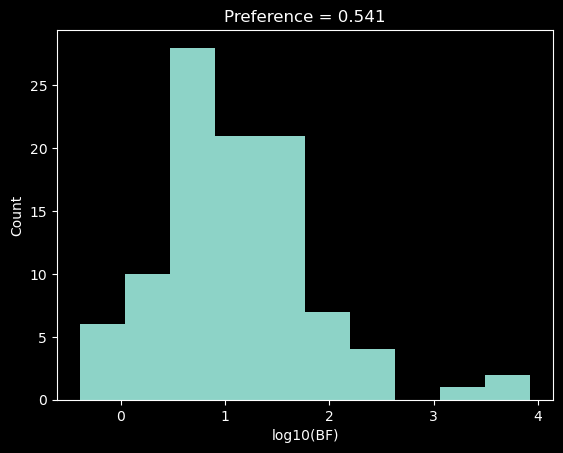

In [72]:
plt.style.use("dark_background")
plt.hist(np.log10(BF_10[:,16]))
plt.ylabel('Count')
plt.xlabel('log10(BF)')
plt.title('Preference = ' + str(round(preference[16],3)))

$\log_{10} \text{BF}_{10} > 1$ means that the data strongly support the hypothesis "A is preferred to B".

Text(0, 0.5, 'log(BF)')

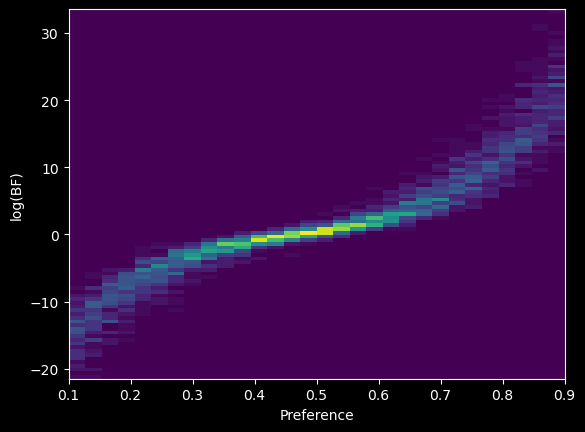

In [73]:
preferences= np.repeat(preference,n_repetitions).reshape((-1,), order = 'F')
plt.hist2d(preferences,np.log10(BF_10).reshape((-1,), order = 'F'), bins = [n_preferences,100])
plt.xlabel('Preference')
plt.ylabel('log(BF)') 

### Comparison with the binomial test

Now, let's compare the procedure described above with a binomial test. The null hypothesis is that $p>0.5$. With this test, we have to aggregate the results for the different items. 

In [74]:
from scipy.stats import binomtest

pval = np.zeros((n_repetitions, n_preferences))

for k in range(n_preferences):
    for j in range(n_repetitions):
        f = np.zeros(N)
        for i, nval in enumerate(n): 
            f[i] = np.random.binomial(nval,preference[k],1)
        test = binomtest(int(np.sum(f)), int(np.sum(n)), alternative='less') 
        pval[j,k] = test.pvalue

Text(0, 0.5, 'p-value')

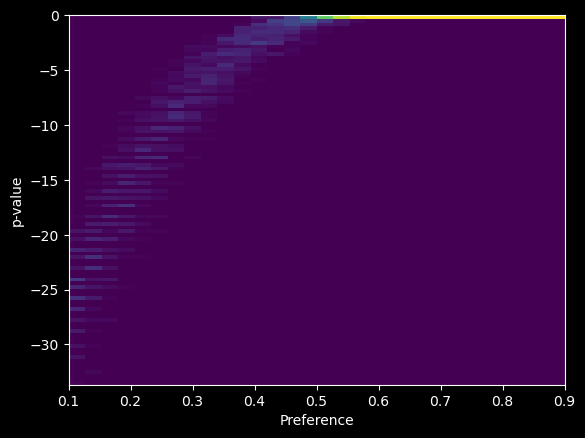

In [75]:
plt.hist2d(preferences, np.log10(pval.reshape((-1,), order = 'F')), bins = [n_preferences,100])
plt.xlabel('Preference')
plt.ylabel('p-value')